## <font color='blue'>  Fait par : CHAIMAA ELALAMI:MSD1 </font>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import time
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Linear convection without CFL

In [2]:
def linearconv_withoutCFL(u, nx, nt, dx):
    dt = .025  
    c = 1.
    un = np.ones(nx)
    for n in range(nt):
        for i in range(nx):
          un[i] = u[i]
        for i in range(1,nx): 
          u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])
    return 0

## Linear convection with CFL

In [3]:
def linearconv_withCFL(u, nx, nt, dx):
    c = 1.
    CFL = 0.8
    dt = CFL*dx/np.fabs(c) 
    un = np.ones(nx)
    for n in range(nt):
        for i in range(nx):
          un[i] = u[i]
        for i in range(1,nx): 
          u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])
    return 0

## Inputs

In [4]:
nx = 81 #change to 83, 85, 91, ... what do you remark ?
dx = 2 / (nx - 1)
nt = 20    

grid = np.linspace(0,2,nx) 
u0 = np.ones(nx)      
u0[int(.5/dx):int(1 / dx + 1)] = 2  

## Call Funtions

### Function without CFL

Text(0.5, 1.0, '1D Linear Convection')

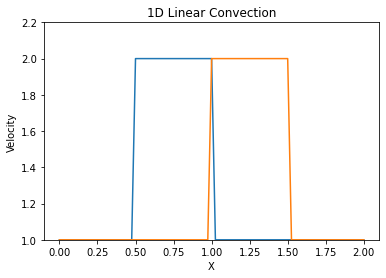

In [5]:
u = u0.copy()
linearconv_withoutCFL(u, nx, nt, dx)

plt.plot(grid,u0);
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')  

### Function with CFL

Text(0.5, 1.0, '1D Linear Convection')

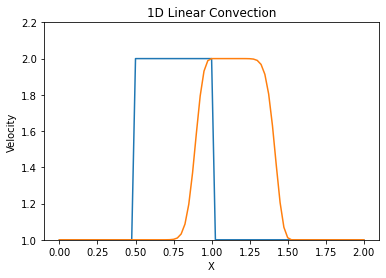

In [6]:
u = u0.copy()
linearconv_withCFL(u, nx, nt, dx)

plt.plot(grid,u0);
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection') 